In [0]:
from keras import models
from keras import layers

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images.shape #60000 imagens de 28 pixels por 28 pixels. 60000 amostras de 28 arrays de tamanho 28

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

In [18]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Modelos das Redes Neurais

In [0]:
network = models.Sequential()

In [0]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

In [0]:
# Essa ultima camada vai utilizar a funcao de ativacao softmax para
# retornar uma probabilidade de cada uma das 10 classes.
# A funcao softmax leva em consideracao todos os elementos de input da camada
# assim ela retorna 3 vetores cuja soma eh igual a 1. A classe que possui maior
# numero associado a posicao do vetor eh a mais provavel de ser dita.
# Cada no da ultima camada esta associado a uma classe
network.add(layers.Dense(10, activation='softmax')) 

In [0]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Agora vamos transformar o conjunto de dados em arrays com dados que variam apenas 
# de 0 a 1 e nao de 0 a 255 como ja eh feito
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
# Agora vamos fazer o one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
network.fit(train_images, train_labels, epochs=5, batch_size=128) # epochs eh o numero de iteracoes

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2564 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1042 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0700 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0501 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0377 - accuracy: 0.9889


In [39]:
test_loss, test_accuracy = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 40us/step


In [40]:
print("Loss : {} - Accuracy : {}".format(test_loss, test_accuracy))

Loss : 0.06679863968847785 - Accuracy : 0.9794999957084656


In [0]:
import numpy as np
x = np.array(12)

In [46]:
# Tensores sao matrizes, um tensor que contem so um numero eh chamado de escalar
# Um tensor escalar tem 0 dimensoes, ndim == 0, como pode ser verifiado abaixo
x.ndim

0

In [50]:
# UM tensor de uma dimensao eh um vetor. Nao confundir um vetor 5D com um Tensor 5D
x = np.array([12,3,6,14])
x.ndim
# Assim como uma matriz eh um tensor 2D, com cada vetor sendo nD
# Geralmente trabalhamos com tensores 0D a 4D, mas 5D pode aparecer com video

1

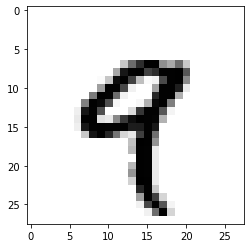

In [53]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [0]:
# Para seleciona apenas os pixels 14x14 pixels do bottom-right corner fazemos
my_slice = train_images[4, 14:, 14:]

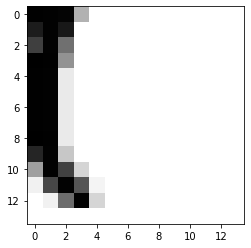

In [55]:
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

In [0]:
# Para seleciona apenas os pixels 14x14 pixels do upper-left corner fazemos
my_second_slice = train_images[4, :14, 14:]

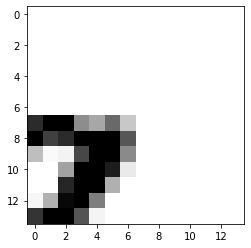

In [59]:
plt.imshow(my_second_slice, cmap=plt.cm.binary)
plt.show()

In [0]:
# Por convencao imagens sao armazenadas num tensor 3D, entao o shape de um tensor com 256x256 pixels e 128 amostras seria (128,256, 256, 3(RGB))
# (128,256, 256, 3(RGB)) e caso fosse apenas em grayscale seria (128,256, 256, 1), apesar de conseguirmos armazenar com (128,256,256)
# O tensor flow coloca por convencao o color axis no fim, o Theano coloca no segundo axis

# Programar keras.layers.Dense(512,activation='relu') eh o mesmo que dizer que o output = relu(dot(input, kernel) + bias) 
# where activation is the element-wise activation function passed as the activation argument,
# kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

#Programando uma naive_relu

def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  
  return x

In [63]:
naive_relu(np.array([12,1,1]))

AssertionError: ignored

In [64]:
# Como o numpy eh implementado com C ou Fortran, eh mais sabio fazer

# z = x + y # Elemt-wise addition
# z = np.maximum(z, 0.) # Element wise Relu

# Element-Wise product = produto matricial
# DOT = produto entre os elementos da matriz

NameError: ignored

In [0]:
# Para rotacionar um vetor 2D em theta, basta multiplicarmos por uma matriz 2x2 [u,v] tal que u = [cos(theta), sen(theta)] e v = [-sen(theta,cos(theta))]
# Quando se faz output = activation(dot(W, input) + b), onde W = Weights e b = bias, W e b inicialmente sao aleatorios, esses valores vao se reajustando
# baseado no feedbacl. Esse ajuste gradual eh o que chamamos de aprendizado, basicamento do que se trata o Aprendizado de mAquina
# O gradiente eh a derivada de uma operacao de tensores. Eh a generalizaca do conceito de derivadas de funcoes de inputs multidimensionais